# HOS 

In [1]:
import _Library_HOS
from Classe_sismogramma_v3 import ClasseDataset
import pandas as pd

# ATTENTO prima di usate get_onset, 1) Fallo su quelle a 200 HZ
                                #   2) PRIMA devi fare filtro passa alto (sui 3-5 Hz)
# parametri di metodo HOS DA OTTIMIZZARE "SUL POLLINO" (però siamo a 100 HZ!!!! poi fai anche test su quelle già picked di DETECT?)
# Scrivi il codice che usi in un unico file e condividi!

hd = "/home/silvia/Desktop/Data/Pollino_All/Pollino_All_data_extended.hdf5"
cs = "/home/silvia/Desktop/Data/Pollino_All/Pollino_All_metadata_extended.csv"

D = ClasseDataset()
D.leggi_custom_dataset(hd,cs)
D.demean()

# sig = _Library_HOS.freq_filter(D.sismogramma[7], 200, 5, type_filter= "highpass")
# onset_1, diff, onset_2 = _Library_HOS.get_onset(sig, 40, threshold=0.1, statistics= _Library_HOS.S_6)
# print(onset_1, onset_2)


In [91]:
import _Library_HOS
import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 100
typ_filter = "highpass"

freq_filter = 1
window_width = 100
tresh = 0.25

stat = _Library_HOS.S_6


for freq_filter in [1,2,3,5,10]:
    for window_width in [40,50,80,100,150,200]:
        for tresh in [0.1,0.2,0.25,0.3,0.4]:
            ons_th = []
            ons_max = []
            for i in range(len(D.sismogramma)):
                sig = _Library_HOS.freq_filter(D.sismogramma[i], D.metadata["sampling_rate"][i], freq_filter, type_filter= typ_filter)
                onset_th, diff, onset_max,u  = _Library_HOS.get_onset_2(sig, window_width, threshold=tresh, statistics= stat)
                ons_th.append(onset_th)
                ons_max.append(onset_max)
                #onset_1, diff, onset_2  = _Library_HOS.get_onset(sig, window_width, threshold=tresh, statistics= stat)
                # print(onset_1, onset_2)
            ons_th = np.array(ons_th)
            ons_max = np.array(ons_max)

(array([  70.,  887., 4413.,  169.,  781.]),
 array([-10000,    -50,     -5,      5,     50,   4000]),
 <BarContainer object of 5 artists>)

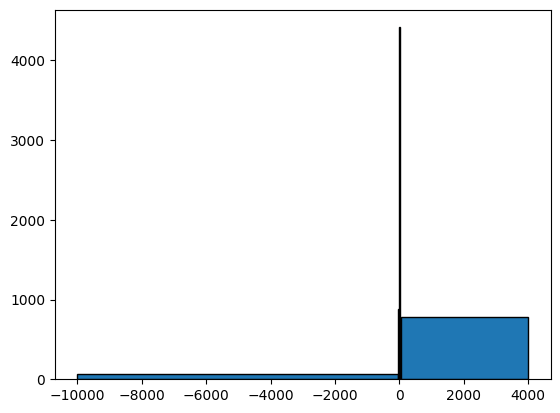

In [113]:
plt.hist(D.metadata["trace_P_arrival_sample"].values-ons_th,bins=[-10000,-50,-5,5,50,4000],edgecolor="black")

# Capire quale impostazione usare

In [81]:
import pandas as pd
impos = pd.read_csv("/home/silvia/Desktop/ONSET_POLLINO.csv")
impos[0:2]
impos_2 = impos.T.drop_duplicates(keep="last").T

In [82]:
impos_2[0:1]

,trace_name,trace_P_arrival_sample,filter freq : 1 window_width: 40 tresh: 0.1_ons_th,filter freq : 1 window_width: 40 tresh: 0.2_ons_th,filter freq : 1 window_width: 40 tresh: 0.25_ons_th,filter freq : 1 window_width: 40 tresh: 0.3_ons_th,filter freq : 1 window_width: 40 tresh: 0.4_ons_th,filter freq : 1 window_width: 40 tresh: 0.4_ons_max,filter freq : 1 window_width: 50 tresh: 0.1_ons_th,filter freq : 1 window_width: 50 tresh: 0.2_ons_th,...,filter freq : 10 window_width: 150 tresh: 0.25_ons_th,filter freq : 10 window_width: 150 tresh: 0.3_ons_th,filter freq : 10 window_width: 150 tresh: 0.4_ons_th,filter freq : 10 window_width: 150 tresh: 0.4_ons_max,filter freq : 10 window_width: 200 tresh: 0.1_ons_th,filter freq : 10 window_width: 200 tresh: 0.2_ons_th,filter freq : 10 window_width: 200 tresh: 0.25_ons_th,filter freq : 10 window_width: 200 tresh: 0.3_ons_th,filter freq : 10 window_width: 200 tresh: 0.4_ons_th,filter freq : 10 window_width: 200 tresh: 0.4_ons_max
0,20100130012400_M2.5.CRAC,2470,2468,2468,2468,2468,2469,2469,2468,2468,...,2469,2469,2469,2469,2469,2469,2469,2469,2469,2469


In [83]:
bonta_10 = []
for key in impos_2.iloc[:,2:]:
    diff = impos_2["trace_P_arrival_sample"] - impos_2[key]
    bonta_10.append(len(diff[(diff<=10) & (diff>=-10)])/len(diff))
    print(len(diff[(diff<=10) & (diff>=-10)])/len(diff),)

0.40400063002047565
0.5952118443849425
0.6443534414868484
0.6819971649078596
0.7276736493936052
0.751771932587809
0.5243345408725784
0.674436919199874
0.7065679634588125
0.7338163490313435
0.7717750826901875
0.7798078437549221
0.6903449362104268
0.7761852260198456
0.7990234682627185
0.8103638368246968
0.8221767207434242
0.8045361474247913
0.7442116868798236
0.8098913214679477
0.8220192156245077
0.8297369664514097
0.8330445739486533
0.8024885808788785
0.808316270278784
0.8382422428728934
0.8442274373917152
0.8456449834619625
0.8417073554890534
0.7919357379114821
0.8308395022838242
0.8481650653646243
0.8470625295322098
0.8446999527484643
0.8341471097810679
0.779335328398173
0.2954796030871003
0.48322570483540717
0.5435501653803748
0.5909592061742006
0.6519136871948338
0.6835722160970231
0.3964403843124902
0.5747361789258151
0.6276578988817136
0.6654591274216412
0.7084580248858088
0.7232635060639471
0.5687509844069932
0.7053079225074815
0.7335013387935108
0.7547645298472201
0.775397700425

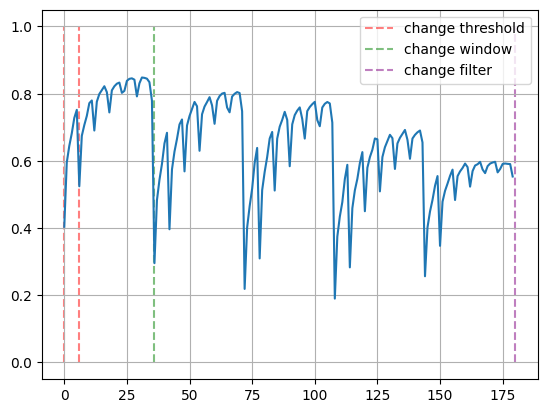

In [108]:
import matplotlib.pyplot as plt

plt.plot(bonta_10)
plt.vlines([0,6],0,1, color="red", zorder=-1, alpha=0.5, linestyle="--", label="change threshold")
plt.vlines(36,0,1, color="green", zorder=-1, alpha=0.5, linestyle="--", label="change window")
plt.vlines(180,0,1, color="purple", zorder=-1, alpha=0.5, linestyle="--", label="change filter")
plt.legend()
plt.grid()


In [58]:
diff[(diff<=10) & (diff>=-10)]

0       1
2      -4
3      -3
4      -9
5       2
       ..
6343   -5
6345    0
6346    2
6347   -3
6348   -5
Length: 3514, dtype: int64

In [62]:
# Creare un DataFrame di esempio
data = {'A': [1, 2, 1, 4],
        'B': [5, 6, 7, 8],
        'C': [1, 2, 1, 4]}  # Colonna duplicata
df = pd.DataFrame(data)

# Visualizzare il DataFrame originale


# Eliminare le colonne duplicate
df_senza_duplicate = df.T.drop_duplicates().T

# Visualizzare il DataFrame senza colonne duplicate
print("DataFrame originale:")
print(df)
print("\nDataFrame senza colonne duplicate:")
print(df_senza_duplicate)

DataFrame originale:
   A  B  C
0  1  5  1
1  2  6  2
2  1  7  1
3  4  8  4

DataFrame senza colonne duplicate:
   A  B
0  1  5
1  2  6
2  1  7
3  4  8


#  PAUSE Change _Library_HOS to work on waveforms all at once!

#### Change sliding_window_view and statistics

In [1]:
import _Library_HOS_2
import numpy as np

a = np.array([i for i in range(10)]) + np.random.random((10))
b = np.array([i+10 for i in range(10)]) + np.random.random((10))
c = np.array([i+20 for i in range(10)]) + np.random.random((10))
due_traces = np.array([a,b])
tre_traces = np.array([a,b,c])+np.random.random((3,10))
tre_traces

array([[ 1.56888843,  2.15675023,  3.69384081,  3.45159547,  4.71701537,
         6.12631746,  6.87529431,  8.53495899,  8.26449068,  9.61450057],
       [11.13526133, 12.11871685, 12.88371162, 14.21732432, 15.38675881,
        16.05977647, 17.02406025, 17.75154621, 18.85652372, 20.14775706],
       [21.24423927, 22.07370784, 23.38646214, 23.34781496, 24.99330981,
        25.12437929, 26.86682034, 28.06015659, 28.80979213, 29.22606121]])

In [ ]:
# FIXME NEW SHAPE
windowed = _Library_HOS.sliding_window_view(tre_traces,(4,),(1,))
reshape1 = windowed.reshape((windowed.shape[0]*windowed.shape[1],windowed.shape[2]),order="F")
reshape2 = reshape1.reshape((windowed.shape[1],windowed.shape[0],windowed.shape[2]))
reshape2.shape
#   (num_traces,  num_windows,    len_window)
#   (     3,          7,              4)
# Dopo aver fatto statistica, mi serve avere uno shape di:
#   (num_traces,   num_windows)
_Library_HOS.S_4(reshape2,axis=-1)  # Funziona (per S_6 vedi dopo)

In [ ]:
# FIXME NEW S_6 statistic

data_all = reshape2
np.sum((data_all-np.expand_dims(np.mean(data_all,axis=axis),axis=-1))**6,axis=axis)/(data_all.shape[-1]-1)/np.std(data_all,ddof=1,axis=axis)**6-15


In [14]:
windowed = _Library_HOS.sliding_window_view(due_traces,(4,),(1,))
windowed

array([[[ 0.49355703,  1.36516461,  2.49094507,  3.67495173],
        [10.4754864 , 11.51315078, 12.51562724, 13.23951818]],

       [[ 1.36516461,  2.49094507,  3.67495173,  4.98433422],
        [11.51315078, 12.51562724, 13.23951818, 14.54834631]],

       [[ 2.49094507,  3.67495173,  4.98433422,  5.94386421],
        [12.51562724, 13.23951818, 14.54834631, 15.64712488]],

       [[ 3.67495173,  4.98433422,  5.94386421,  6.43628322],
        [13.23951818, 14.54834631, 15.64712488, 16.25220119]],

       [[ 4.98433422,  5.94386421,  6.43628322,  7.91873155],
        [14.54834631, 15.64712488, 16.25220119, 17.48729665]],

       [[ 5.94386421,  6.43628322,  7.91873155,  8.42295917],
        [15.64712488, 16.25220119, 17.48729665, 18.46169721]],

       [[ 6.43628322,  7.91873155,  8.42295917,  9.49055103],
        [16.25220119, 17.48729665, 18.46169721, 19.45918373]]])

In [16]:
reshape1 = windowed.reshape((windowed.shape[0]*windowed.shape[1],windowed.shape[2]),order="F")
reshape2 = reshape1.reshape((windowed.shape[1],windowed.shape[0],windowed.shape[2]))
reshape2

array([[[ 0.49355703,  1.36516461,  2.49094507,  3.67495173],
        [ 1.36516461,  2.49094507,  3.67495173,  4.98433422],
        [ 2.49094507,  3.67495173,  4.98433422,  5.94386421],
        [ 3.67495173,  4.98433422,  5.94386421,  6.43628322],
        [ 4.98433422,  5.94386421,  6.43628322,  7.91873155],
        [ 5.94386421,  6.43628322,  7.91873155,  8.42295917],
        [ 6.43628322,  7.91873155,  8.42295917,  9.49055103]],

       [[10.4754864 , 11.51315078, 12.51562724, 13.23951818],
        [11.51315078, 12.51562724, 13.23951818, 14.54834631],
        [12.51562724, 13.23951818, 14.54834631, 15.64712488],
        [13.23951818, 14.54834631, 15.64712488, 16.25220119],
        [14.54834631, 15.64712488, 16.25220119, 17.48729665],
        [15.64712488, 16.25220119, 17.48729665, 18.46169721],
        [16.25220119, 17.48729665, 18.46169721, 19.45918373]]])

In [18]:
_Library_HOS.sliding_window_view(a,(4,),(1,))

array([[0.49355703, 1.36516461, 2.49094507, 3.67495173],
       [1.36516461, 2.49094507, 3.67495173, 4.98433422],
       [2.49094507, 3.67495173, 4.98433422, 5.94386421],
       [3.67495173, 4.98433422, 5.94386421, 6.43628322],
       [4.98433422, 5.94386421, 6.43628322, 7.91873155],
       [5.94386421, 6.43628322, 7.91873155, 8.42295917],
       [6.43628322, 7.91873155, 8.42295917, 9.49055103]])

In [21]:
reshape2[0]

array([[0.49355703, 1.36516461, 2.49094507, 3.67495173],
       [1.36516461, 2.49094507, 3.67495173, 4.98433422],
       [2.49094507, 3.67495173, 4.98433422, 5.94386421],
       [3.67495173, 4.98433422, 5.94386421, 6.43628322],
       [4.98433422, 5.94386421, 6.43628322, 7.91873155],
       [5.94386421, 6.43628322, 7.91873155, 8.42295917],
       [6.43628322, 7.91873155, 8.42295917, 9.49055103]])

In [22]:
_Library_HOS.S_6(reshape2[0])

array([-13.38032883, -13.3291254 , -13.47604115, -13.08671291,
       -12.78527542, -14.05955919, -12.83869574])

In [30]:
axis = -1
data = reshape2[1]
np.sum((data-np.mean(data,axis=axis)[:,None])**6,axis=axis)/(data.shape[1]-1)/np.std(data,ddof=1,axis=axis)**6-15


array([-13.39442875, -13.0488393 , -13.5539501 , -13.25174429,
       -13.00344149, -13.60509282, -13.24959532])

In [29]:
data_all = reshape2
np.sum((data_all-np.expand_dims(np.mean(data_all,axis=axis),axis=-1))**6,axis=axis)/(data_all.shape[-1]-1)/np.std(data_all,ddof=1,axis=axis)**6-15


array([[-13.38032883, -13.3291254 , -13.47604115, -13.08671291,
        -12.78527542, -14.05955919, -12.83869574],
       [-13.39442875, -13.0488393 , -13.5539501 , -13.25174429,
        -13.00344149, -13.60509282, -13.24959532]])

#### Change get_onset

In [6]:
import _Library_HOS_2
import numpy as np

a = np.array([i for i in range(10)]) + np.random.random((10))
b = np.array([i+10 for i in range(10)]) + np.random.random((10))
c = np.array([i+20 for i in range(10)]) + np.random.random((10))
due_traces = np.array([a,b])
tre_traces = np.array([a,b,c])+np.random.random((3,10))
due_traces

array([[ 0.16303612,  1.36046704,  2.88455666,  3.83591886,  4.66400541,
         5.20073332,  6.87373291,  7.88550902,  8.31459994,  9.8093213 ],
       [10.67073564, 11.43098573, 12.55908744, 13.16089003, 14.56900389,
        15.05712535, 16.27789214, 17.6983035 , 18.004521  , 19.87951027]])

In [38]:
waveform = due_traces

hos = _Library_HOS_2.get_hos(detr, 4, _Library_HOS_2.S_4 )
hos




array([[-1.13754664, -1.02800477, -1.90909864, -1.08714411, -1.51938684,
        -1.0678771 , -1.60243233],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan]])

In [35]:

# get a sliding window view of given np array
slid_view =  _Library_HOS_2.sliding_window_view(detr, (4,), (1,))

# apply the function of slid_view along axis 1
_Library_HOS_2.S_4(slid_view,axis=-1)

array([[-1.78781512, -1.41288384, -0.99278704, -0.87325471, -0.80538792,
        -1.99594026, -0.84042707],
       [-1.13754664, -1.02800477, -1.90909864, -1.08714411, -1.51938684,
        -1.0678771 , -1.60243233]])

In [32]:
scipy.signal.detrend(due_traces)

array([[-0.2956857 , -0.1294695 ,  0.36340541,  0.28355288,  0.08042471,
        -0.4140621 ,  0.22772277,  0.20828417, -0.39383964,  0.069667  ],
       [ 0.22435541, -0.01193344,  0.11962932, -0.27510704,  0.13646786,
        -0.37194963, -0.14772178,  0.27615063, -0.41417082,  0.4642795 ]])

In [37]:
detr = np.array([[ 0.22435541, -0.01193344,  0.11962932, -0.27510704,  0.13646786,
        -0.37194963, -0.14772178,  0.27615063, -0.41417082,  0.4642795 ],
       [ 0.22435541, -0.01193344,  0.11962932, -0.27510704,  0.13646786,
        -0.37194963, -0.14772178,  0.27615063, -0.41417082,  0.4642795 ]])

In [39]:
detr.shape

(2, 10)

In [40]:
due_traces.shape

(2, 10)